# Analysis of Auction mechanisms

In [1]:
from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
results_filename = "../data/auctions_paper_40_8_07-07_22-31-36.json"

with open(results_filename) as file:
    results_data = json.load(file)

In [3]:
auction_results = {}
for model_results in results_data:
    for auction, auction_result in model_results.items():
        if auction == 'model':
            continue
        if auction in auction_results:
            auction_results[auction].append(auction_result)
        else:
            auction_results[auction] = [auction_result]
            
print(f'Number of algorithms: {len(auction_results)}')

Number of algorithms: 4


## Auction results

In [4]:
auction_avg_results = []
for algorithm, results in auction_results.items():
    auction_avg_results.append([
        algorithm,
        np.mean([r['social welfare'] for r in results]), 
        np.mean([r['social welfare percent'] for r in results]), 
        np.mean([r['percentage tasks allocated'] for r in results]),
        np.mean([r['total revenue'] for r in results]),
        np.mean([r['solve time'] for r in results])
    ])
    
auction_df = pd.DataFrame(auction_avg_results, columns=['name', 'social welfare', 'social welfare percent',
                                                        'percentage tasks allocated', 'total revenue', 'solve time'])
auction_df = auction_df.sort_values(by='social welfare', ascending=False)

Text(0.5, 1.0, 'Solve Time')

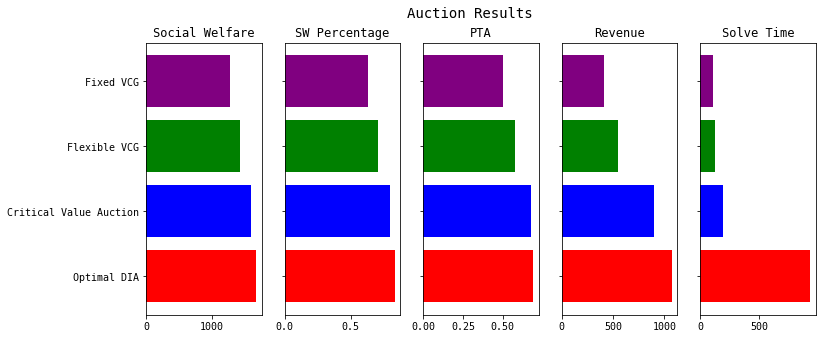

In [5]:
system_fig, (ax_sw, ax_swp, ax_pta, ax_rev, ax_st) = plt.subplots(1, 5, figsize=(12,5))
system_fig.suptitle('Auction Results', fontsize=14)
colour = ['red', 'blue', 'green', 'purple']

ax_sw.barh(auction_df['name'], auction_df['social welfare'], color=colour)
ax_sw.set_title('Social Welfare')

ax_swp.barh(auction_df['name'], auction_df['social welfare percent'], color=colour)
plt.setp(ax_swp.get_yticklabels(), visible=False)
ax_swp.set_title('SW Percentage')

ax_pta.barh(auction_df['name'], auction_df['percentage tasks allocated'], color=colour)
plt.setp(ax_pta.get_yticklabels(), visible=False)
ax_pta.set_title('PTA')

ax_rev.barh(auction_df['name'], auction_df['total revenue'], color=colour)
plt.setp(ax_rev.get_yticklabels(), visible=False)
ax_rev.set_title('Revenue')

ax_st.barh(auction_df['name'], auction_df['solve time'], color=colour)
plt.setp(ax_st.get_yticklabels(), visible=False)
ax_st.set_title('Solve Time')

## Algorithm Task Prices

In [6]:
algos = ['Fixed VCG', 'Flexible VCG', 'Critical Value Auction', 'Optimal DIA']
task_prices = [
    [price for result in auction_results[algo] for price in result['task prices'].values()] for algo in algos
]

Text(0.5, 1.0, 'All Algorithm Task Price Distribution')

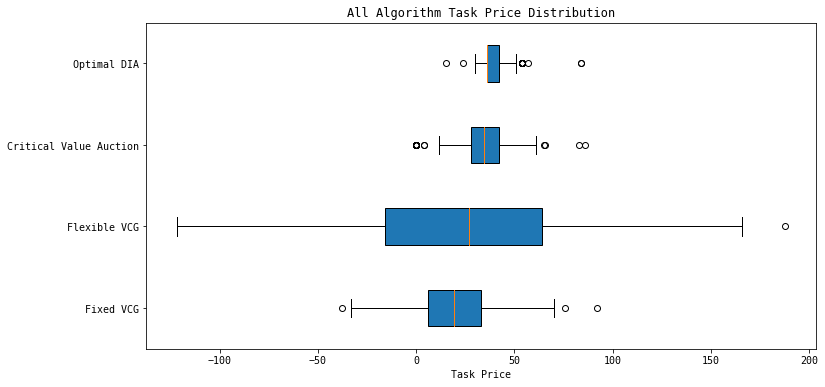

In [7]:
task_price_box_fig, ax_box = plt.subplots(figsize=(12, 6))
ax_box.boxplot(task_prices, vert=False, patch_artist=True)
ax_box.set_yticklabels(algos)
ax_box.set_xlabel('Task Price')
ax_box.set_title('All Algorithm Task Price Distribution')


## Task value and price distributions

Text(0.5, 1.0, 'CVA Task Price Distribution')

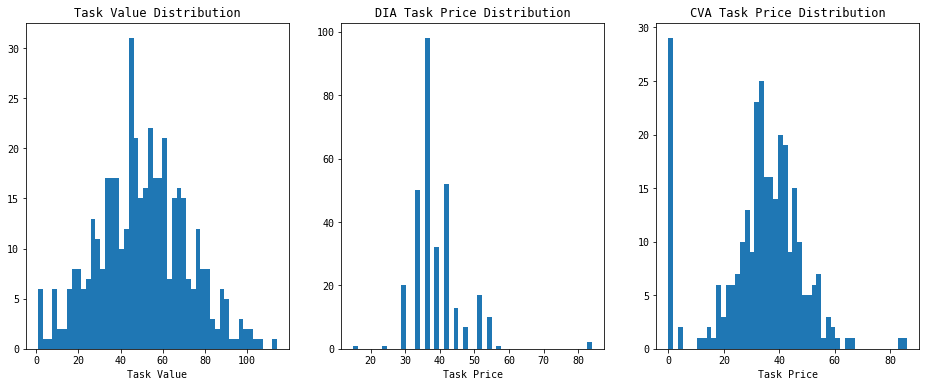

In [25]:
task_price_box_fig, (ax_value_hist, ax_dia_hist, ax_cva_dist) = plt.subplots(1, 3, figsize=(16, 6))

task_values = [task['value'] for result in results_data for task in result['model']['tasks']]
ax_value_hist.hist(task_values, bins=50)
ax_value_hist.set_xlabel('Task Value')
ax_value_hist.set_title('Task Value Distribution')

ax_dia_hist.hist(task_prices[3], bins=50)
ax_dia_hist.set_xlabel('Task Price')
ax_dia_hist.set_title('DIA Task Price Distribution')

ax_cva_dist.hist(task_prices[2], bins=50)
ax_cva_dist.set_xlabel('Task Price')
ax_cva_dist.set_title('CVA Task Price Distribution')

## DIA vs CVA Price difference

Text(0.5, 1.0, 'CVA Value - Price Difference')

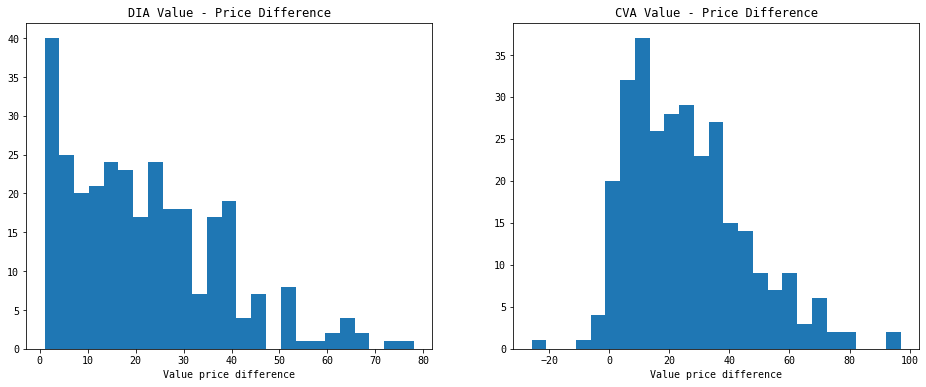

In [28]:
price_diff_fig, (ax_dia_diff, ax_cva_diff) = plt.subplots(1, 2, figsize=(16, 6))

dia_diff = [task['value'] - result['Optimal DIA']['task prices'][task['name']] 
            for result in results_data for task in result['model']['tasks']
            if task['name'] in result['Optimal DIA']['task prices']]
ax_dia_diff.hist(dia_diff, bins=25)
ax_dia_diff.set_xlabel('Value price difference')
ax_dia_diff.set_title('DIA Value - Price Difference')

cva_diff = [task['value'] - result['Critical Value Auction']['task prices'][task['name']] 
            for result in results_data for task in result['model']['tasks']
            if task['name'] in result['Critical Value Auction']['task prices']]
ax_cva_diff.hist(cva_diff, bins=25)
ax_cva_diff.set_xlabel('Value price difference')
ax_cva_diff.set_title('CVA Value - Price Difference')